# Exploratory Data Analysis

## Importing Libraries

In this section, we import the necessary Python libraries for data analysis and visualization:

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [144]:
df=pd.read_csv('cleaned_data')

In [145]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [146]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

## Splitting Features into Categorical and Numerical

In [148]:
cat_features = df.select_dtypes(include="object").drop(columns=["EmpNumber"]).columns
num_features = df.select_dtypes(include=["int64", "float64"]).drop('PerformanceRating',axis=1).columns

print("Categorical Features:")
print(list(cat_features))
print("-" * 100)   # Divider line
print("Numerical Features:")
print(list(num_features))

Categorical Features:
['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']
----------------------------------------------------------------------------------------------------
Numerical Features:
['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## Pie Charts for Categorical Features
- Pie charts show the proportion of categories for selected features (`Gender`, `MaritalStatus`, `OverTime`, `BusinessTravelFrequency`).  
- This gives a quick visual overview of how employees are distributed across these categories.

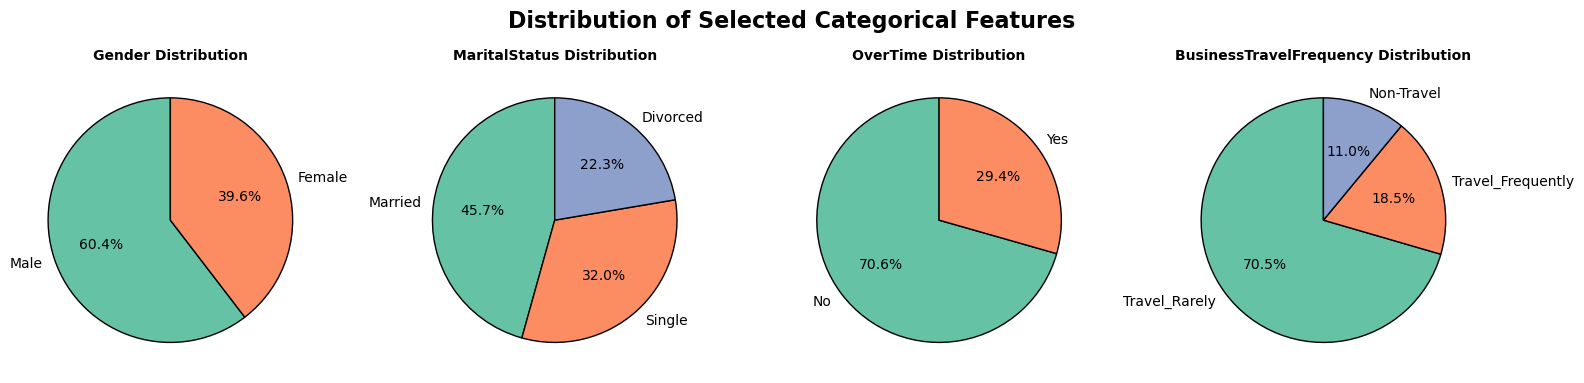

In [150]:
# Pie charts for selected categorical features in a single row
pie_features = ['Gender', 'MaritalStatus', 'OverTime', 'BusinessTravelFrequency']

plt.figure(figsize=(16, 4))  # wider figure for a single row

for i, col in enumerate(pie_features):
    value_counts = df[col].value_counts()
    
    plt.subplot(1, 4, i+1)   
    plt.pie(
        value_counts,
        labels=value_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("Set2"),
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f"{col} Distribution", fontsize=10, fontweight="bold")
plt.suptitle("Distribution of Selected Categorical Features", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


#### From the pie charts:  

- **Gender**: Most employees are **male**, indicating a male-dominated workforce.  
- **Marital Status**: The majority of employees are **married**, followed by **single**, with **divorced** employees being the least.  
- **OverTime**: Most employees **do not work overtime**, while a small portion works extended hours.  
- **Business Travel Frequency**: Most employees **travel rarely**, a smaller portion **travels frequently**, and very few employees **do not travel**.


### Analysis of Categorical Features with Multiple Unique Values

- These countplots focus on categorical features that have **multiple unique categories**, allowing us to see **how many employees belong to each category**.  
- This helps identify patterns, dominant groups, and potential imbalances within the workforce.


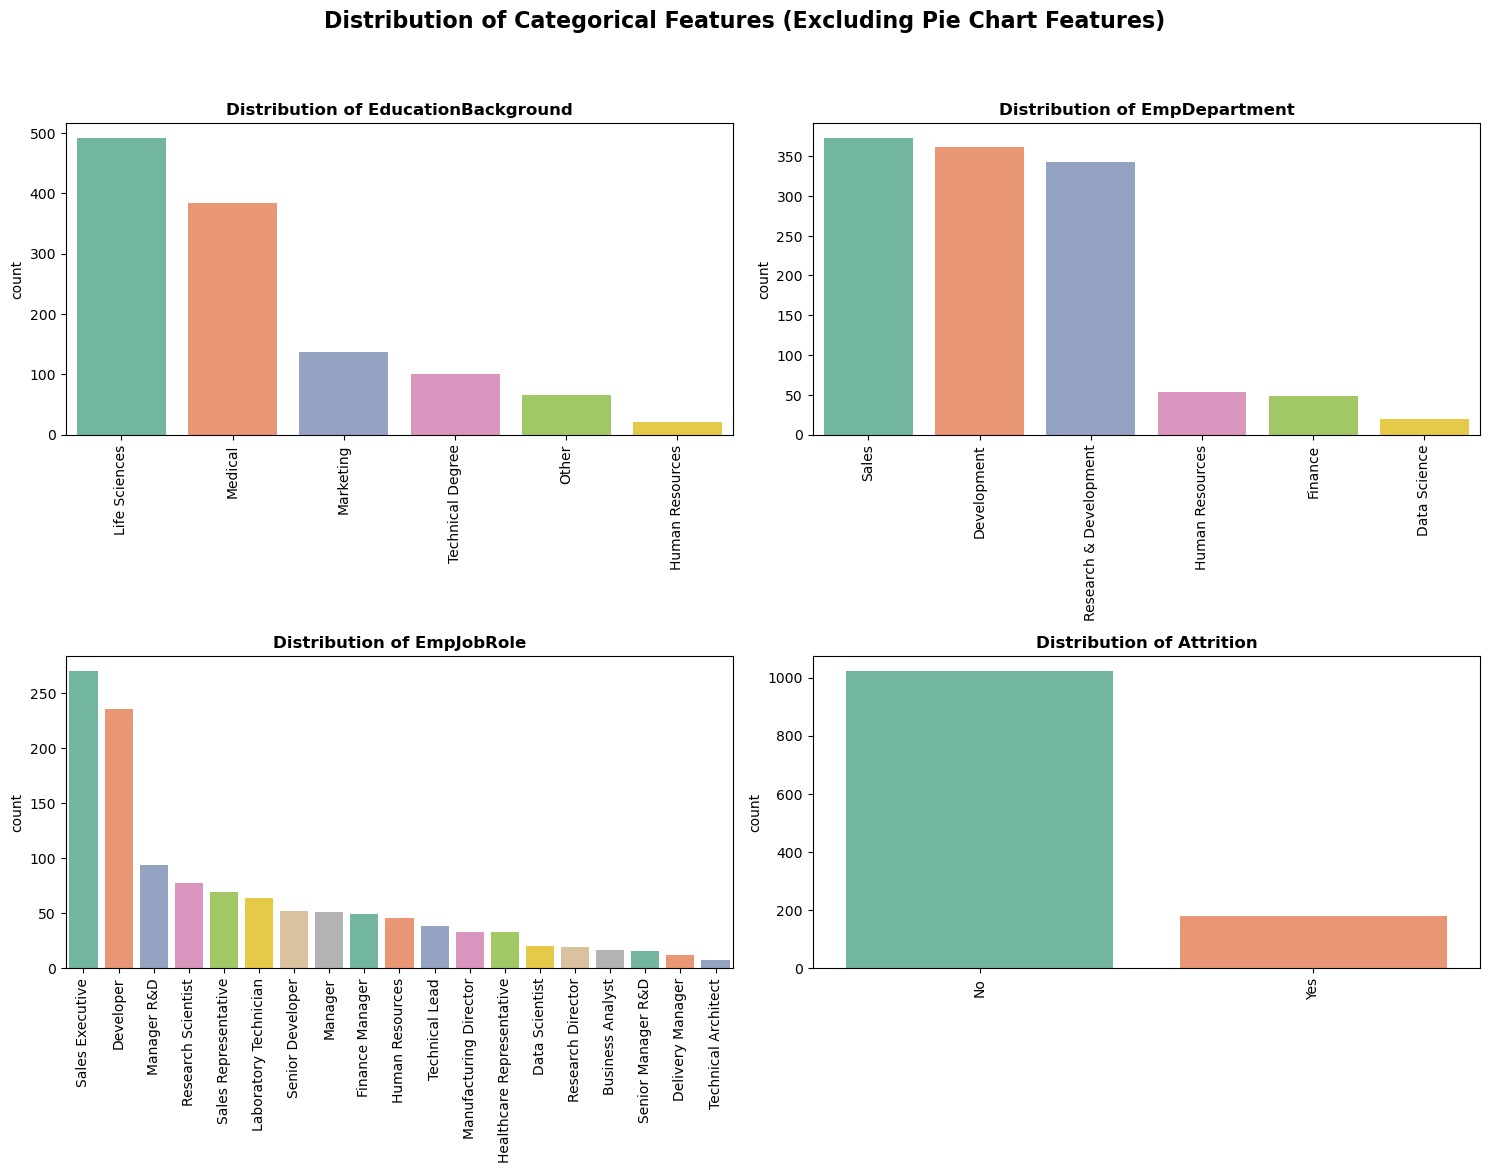

In [153]:
# Countplot distribution for remaining categorical features
bar_features=[col for col in cat_features if col not in pie_features]

plt.figure(figsize=(15, 20))
for i, col in enumerate(bar_features):
    plt.subplot(4,2,i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")
    plt.title(f"Distribution of {col}",weight='bold')
    plt.xticks(rotation=90)
    plt.xlabel("") 


plt.suptitle("Distribution of Categorical Features (Excluding Pie Chart Features)", fontsize=16, fontweight='bold',y=1.02)
plt.tight_layout()
plt.show()
                                

#### Insights from Categorical Feature Analysis

From the countplots, we observe some **potential imbalances within the workforce**:  

- **Education Background**: Most employees have a background in **Life Sciences and Medical**, while very few come from **Human Resources**. Employees with **Marketing, Technical, and Other** backgrounds are distributed fairly evenly.  

- **Department Distribution**: The majority of employees work in **Sales, Development, and Research & Development**, whereas **Data Science, Finance, and HR** have relatively few employees.  

- **Job Roles**: Most employees hold positions as **Sales Executives or Developers**, while very few are **Technical Architects**. Other job roles have a roughly equal number of employees.  

- **Attrition**: Over **three-quarters of employees** have **not left the company (Attrition = No)**, while approximately **one-quarter** have left (Attrition = Yes).


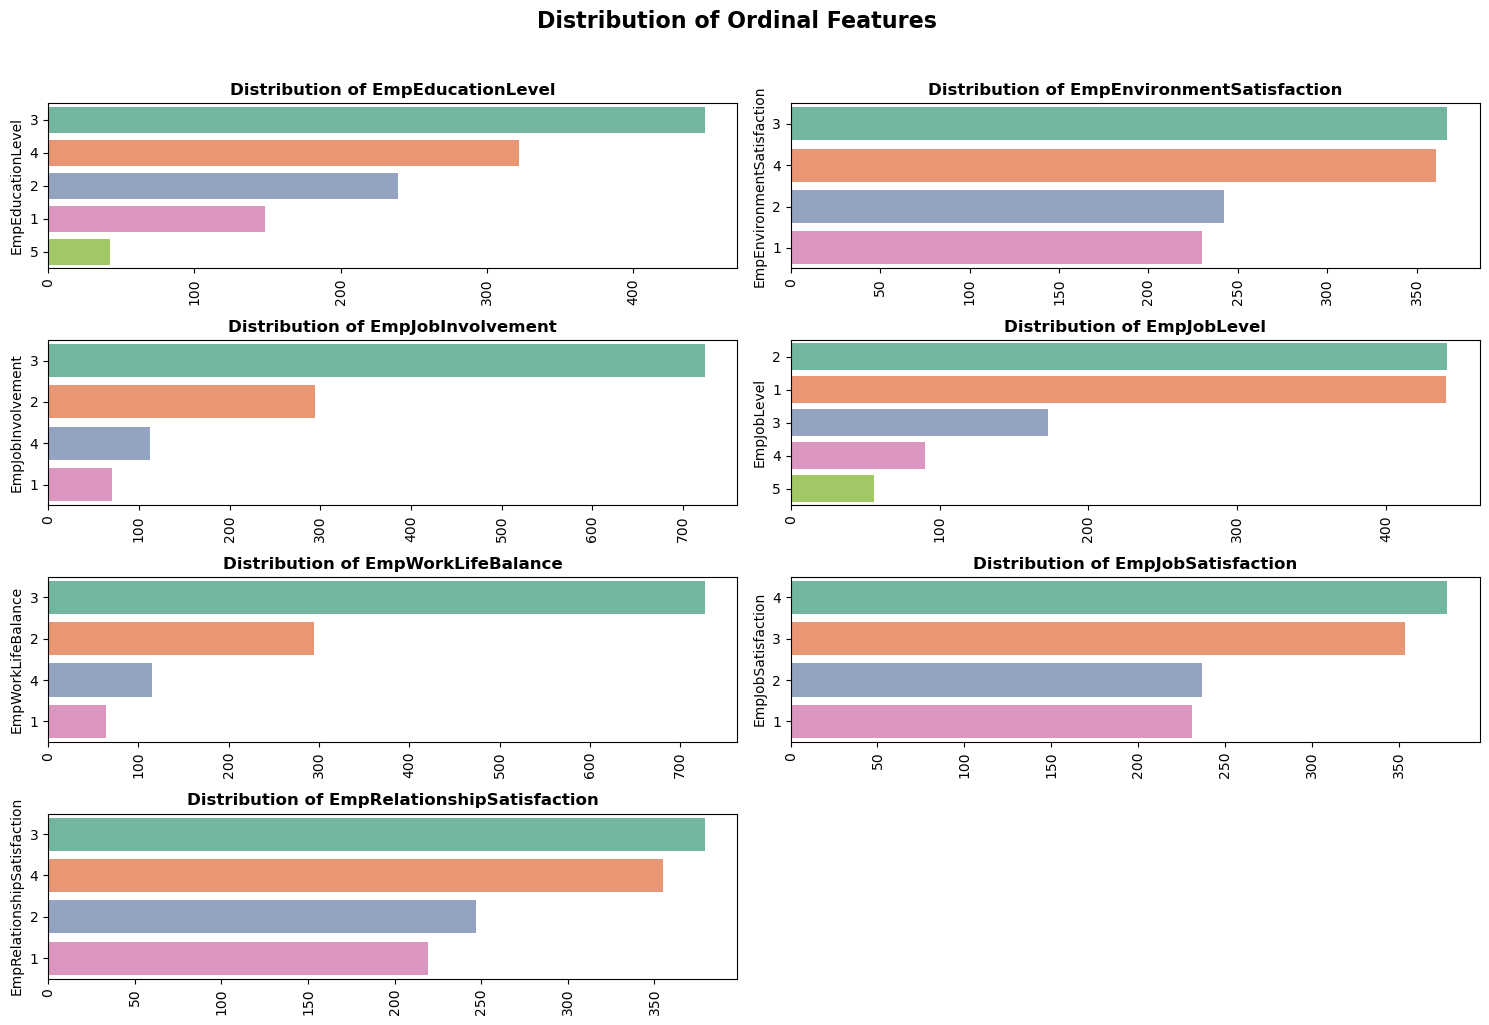

In [155]:
ordinal_features = [
    'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
    'EmpJobLevel', 'EmpWorkLifeBalance', 'EmpJobSatisfaction',
    'EmpRelationshipSatisfaction'
]

plt.figure(figsize=(15, 10))
for i,col in enumerate(ordinal_features):
    plt.subplot(4,2,i+1)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="Set2")
    plt.title(f"Distribution of {col}",weight='bold')
    plt.xticks(rotation=90)
    plt.xlabel("") 


plt.suptitle("Distribution of Ordinal Features  ", fontsize=16, fontweight='bold',y=1.02)
plt.tight_layout()
plt.show()

### Summary: Distribution of Ordinal Features

| Feature                        | Observation                                                                 |
|--------------------------------|-----------------------------------------------------------------------------|
| **EmpEducationLevel**          | Most employees are at level **3 or 4**; very few at level 1.                |
| **EmpEnvironmentSatisfaction** | Fairly balanced, but more employees rate satisfaction as **3 or 4 (high)**. |
| **EmpJobInvolvement**          | Majority report level **3 (high involvement)**, fewer at low levels.        |
| **EmpJobLevel**                | Most employees are at **levels 1–2**, with very few at level 5.             |
| **EmpWorkLifeBalance**         | Majority rate balance as **3 (good)**, fewer at 1 (poor).                   |
| **EmpJobSatisfaction**         | Well spread across all 4 levels, slightly more employees at **level 4**.    |
| **EmpRelationshipSatisfaction**| Quite balanced, but more employees at **levels 3 and 4**.                   |

---

✅ **Overall Insight**:  
- Employees generally report **higher satisfaction and involvement levels (3–4)**.  
- **Job Level** is skewed toward junior–mid positions (1–2 dominate).  
- **Education** is concentrated at moderate levels (3–4).  
- Very few employees fall into the **lowest category (1)** across most features, indicating an overall **positive employee sentiment**.


### Distribution of Numerical Features

#### For each numerical feature, we visualize both the **histogram with KDE** and the **boxplot**:  

- **Histogram + KDE**: Shows the distribution, skewness, and density of values.  
- **Boxplot**: Highlights the **spread, central tendency, and anomalies** 


### 1.) Distribution and Boxplot of Age


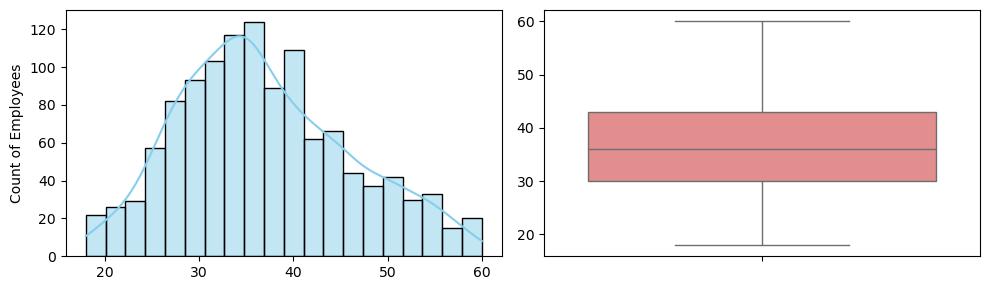

In [159]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df['Age'], kde=True, bins=20, ax=ax[0], color="skyblue")
ax[0].set_xlabel("")
ax[0].set_ylabel("Count of Employees")

sns.boxplot(y=df['Age'], ax=ax[1], color="lightcoral")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()




The age distribution is roughly **symmetrical**, with **50% of employees between 30 and 45 years old**. Very few employees are extremely young or old.


### 2.)Distribution and Boxplot of DistanceFromHome


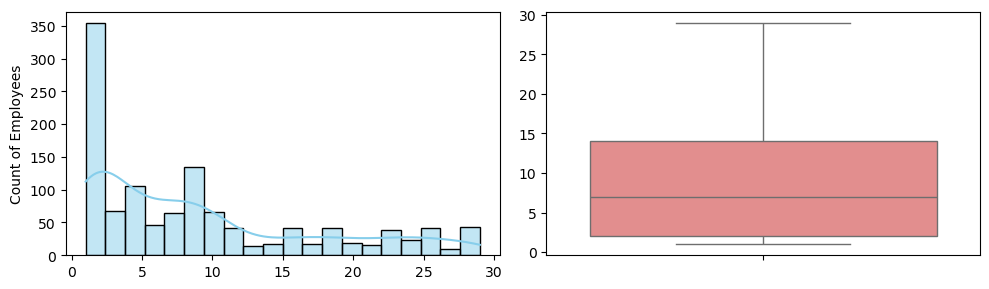

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df['DistanceFromHome'], kde=True, bins=20, ax=ax[0], color="skyblue")
ax[0].set_xlabel("")
ax[0].set_ylabel("Count of Employees")

sns.boxplot(y=df['DistanceFromHome'], ax=ax[1], color="lightcoral")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()



The distribution is **right-skewed**, indicating most employees **commute shorter distances** (3–13 km), while few commute from far away.


### 3.) Distribution and Boxplot of EmpHourlyRate

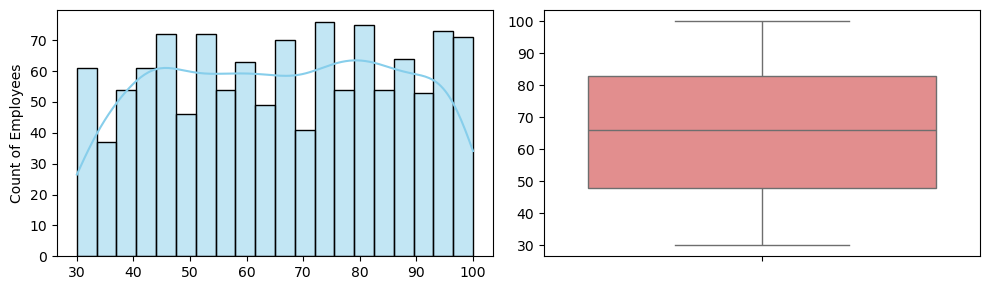

In [165]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df['EmpHourlyRate'], kde=True, bins=20, ax=ax[0], color="skyblue")
ax[0].set_xlabel("")
ax[0].set_ylabel("Count of Employees")

sns.boxplot(y=df['EmpHourlyRate'], ax=ax[1], color="lightcoral")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()



The distribution is **approximately uniform**, suggesting a **relatively equal number of employees** across different hourly rates. Most employees have hourly rates **between 48 and 82**.


### 4.) Distribution and Boxplot of NumCompaniesWorked


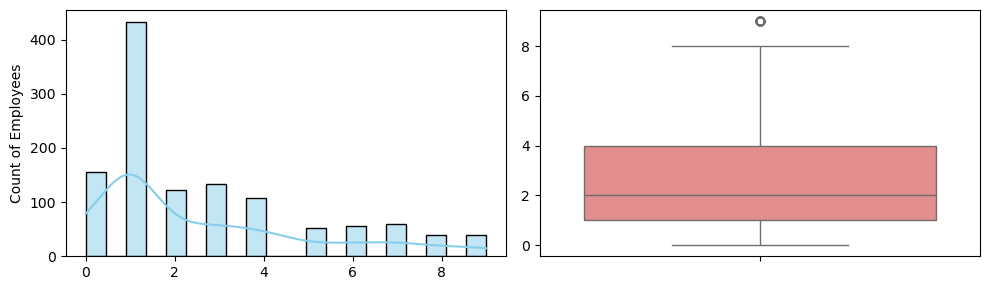

In [168]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df['NumCompaniesWorked'], kde=True, bins=20, ax=ax[0], color="skyblue")
ax[0].set_xlabel("")
ax[0].set_ylabel("Count of Employees")

sns.boxplot(y=df['NumCompaniesWorked'], ax=ax[1], color="lightcoral")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()




The distribution is **right-skewed** with a peak at **1**, meaning most employees have worked in only one company. Some high outliers exist, representing employees who have worked at many companies.


### 5.)Distribution and Boxplot of EmpLastSalaryHikePercent


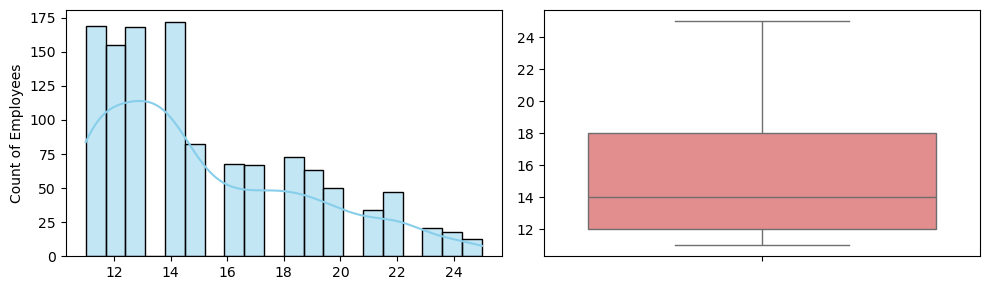

In [171]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df['EmpLastSalaryHikePercent'], kde=True, bins=20, ax=ax[0], color="skyblue")
ax[0].set_xlabel("")
ax[0].set_ylabel("Count of Employees")

sns.boxplot(y=df['EmpLastSalaryHikePercent'], ax=ax[1], color="lightcoral")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()



The distribution is **right-skewed**, with most salary hikes in the **12–18% range**. Very few employees received higher increases above 18%.


### 6.)Distribution and Boxplot of TotalWorkExperienceInYears


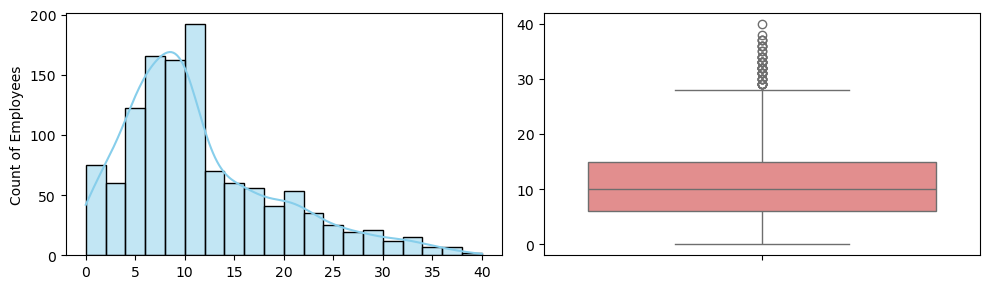

In [174]:
fig, ax = plt.subplots(1, 2, figsize=(10,3 ))

sns.histplot(df['TotalWorkExperienceInYears'], kde=True, bins=20, ax=ax[0], color="skyblue")
ax[0].set_xlabel("")
ax[0].set_ylabel("Count of Employees")

sns.boxplot(y=df['TotalWorkExperienceInYears'], ax=ax[1], color="lightcoral")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()



This is **right-skewed**, with most employees having **5–15 years of experience**. Some high outliers exist, up to **40 years**, representing very senior staff.


### 7.)Distribution and Boxplot of TrainingTimesLastYear


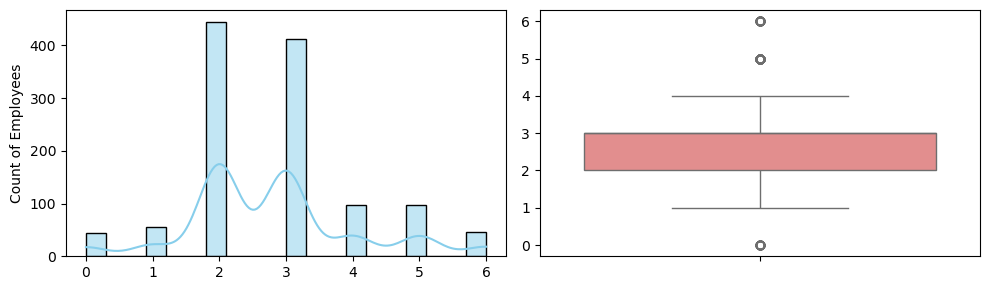

In [177]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df['TrainingTimesLastYear'], kde=True, bins=20, ax=ax[0], color="skyblue")
ax[0].set_xlabel("")
ax[0].set_ylabel("Count of Employees")

sns.boxplot(y=df['TrainingTimesLastYear'], ax=ax[1], color="lightcoral")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()




The distribution is **bimodal**, with peaks at **2 and 3 trainings**. Some outliers exist at **0, 5, and 6**, indicating employees with no or many training sessions.


### 8.) Distribution and Boxplot of ExperienceYearsAtThisCompany


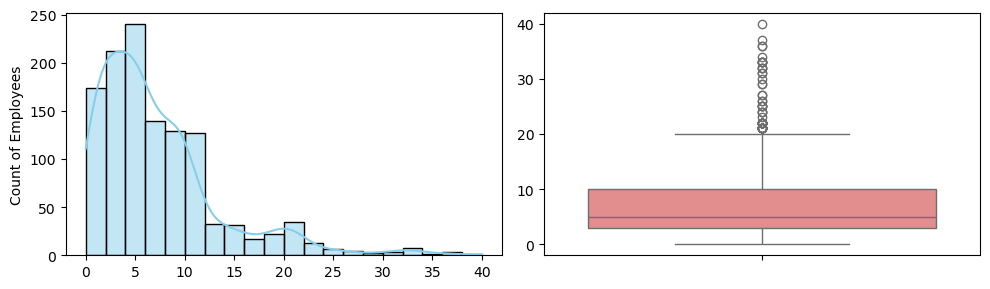

In [180]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df['ExperienceYearsAtThisCompany'], kde=True, bins=20, ax=ax[0], color="skyblue")
ax[0].set_xlabel("")
ax[0].set_ylabel("Count of Employees")

sns.boxplot(y=df['ExperienceYearsAtThisCompany'], ax=ax[1], color="lightcoral")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()




The distribution is **right-skewed**, showing most employees **have spent few years at the company**, while few have very high tenure (likely founders or senior executives).


### 9.)Distribution and Boxplot of ExperienceYearsInCurrentRole


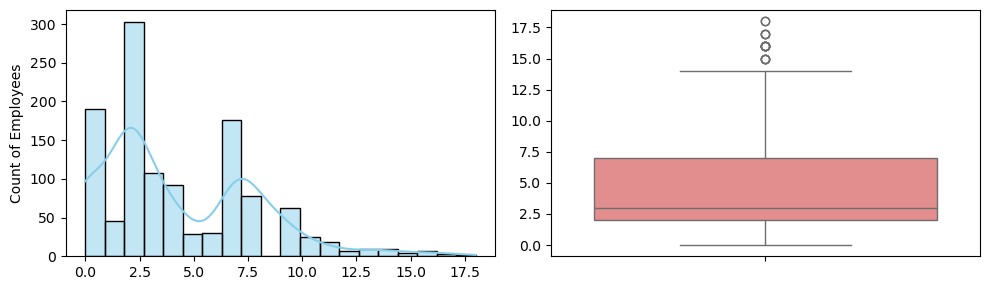

In [183]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df['ExperienceYearsInCurrentRole'], kde=True, bins=20, ax=ax[0], color="skyblue")
ax[0].set_xlabel("")
ax[0].set_ylabel("Count of Employees")

sns.boxplot(y=df['ExperienceYearsInCurrentRole'], ax=ax[1], color="lightcoral")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()



The distribution is **right-skewed**, with most employees having **2.5–7 years in their current role**. Few employees have very long tenure in their role, representing senior staff.


### 10.)Distribution and Boxplot of YearsSinceLastPromotion


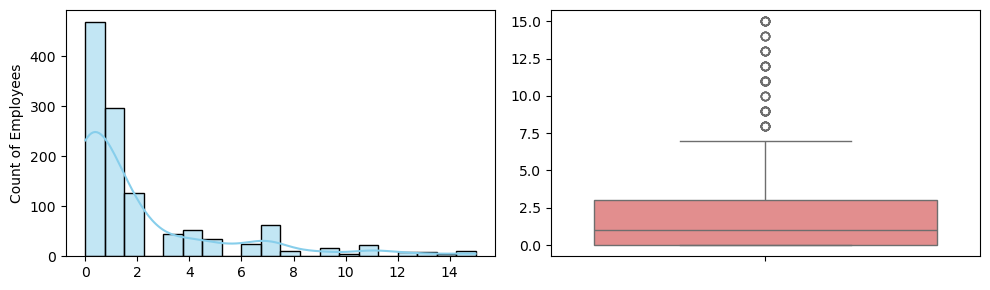

In [186]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df['YearsSinceLastPromotion'], kde=True, bins=20, ax=ax[0], color="skyblue")
ax[0].set_xlabel("")
ax[0].set_ylabel("Count of Employees")

sns.boxplot(y=df['YearsSinceLastPromotion'], ax=ax[1], color="lightcoral")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()



The distribution is **right-skewed**, with a peak at **0**, indicating most employees are promoted frequently. Some high outliers reflect senior roles where promotions take longer.


### 11.) Distribution and Boxplot of YearsWithCurrManager


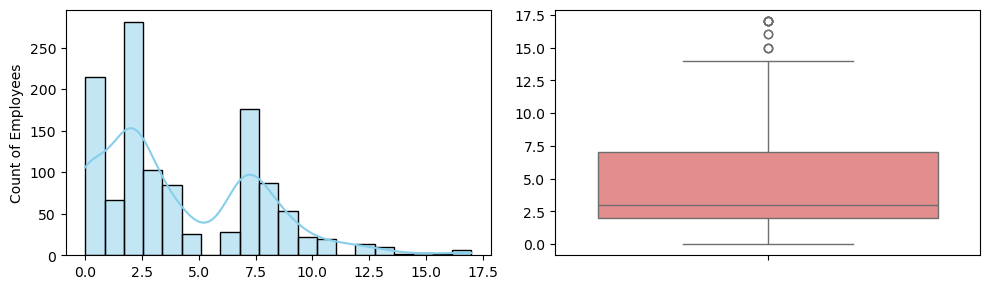

In [189]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df['YearsWithCurrManager'], kde=True, bins=20, ax=ax[0], color="skyblue")
ax[0].set_xlabel("")
ax[0].set_ylabel("Count of Employees")

sns.boxplot(y=df['YearsWithCurrManager'], ax=ax[1], color="lightcoral")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()




The distribution is **right-skewed**, showing most employees have **2.5–7 years with their current manager**. Very few have long supervisory periods with the same manager.


## Conclusion on Numerical Feature Distributions

Looking at the numerical features, we can see some **outliers**.  

These outliers are **not mistakes**. They show real possibilities, like:  
- Employees with a lot of experience or long time at the company.  
- Employees with high salary increases or hourly rates.  
- Employees who had many trainings or worked at many companies.  

Overall, most employees fall in common ranges, but some differences are natural and expected.


# Employee Performance Rating Analysis

### Convert numeric Performance Ratings to categorical labels

In [194]:

rating_mapping = {
    2: "Low",
    3: "Medium",
    4: "High"
}

df['PerformanceRatingCat'] = df['PerformanceRating'].map(rating_mapping)

# Check the distribution
df['PerformanceRatingCat'].value_counts()

PerformanceRatingCat
Medium    874
Low       194
High      132
Name: count, dtype: int64

## Performance Rating Overview

Out of 1,200 employees:  
- **874** have **Medium** performance  
- **194** have **Low** performance  
- **132** have **High** performance  

This analysis aims to identify the **underlying causes of performance differences** and highlight clear indicators of **low-performing employees**.


## 1.)Distribution of Employee Performance Ratings

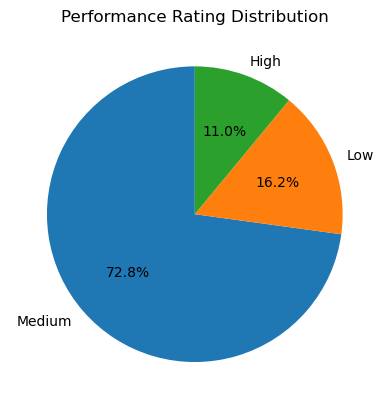

In [197]:
performance = df['PerformanceRatingCat'].value_counts()

plt.pie(
    performance,                           
    labels=performance.index,              
    autopct="%1.1f%%",               
    startangle=90,                   
)

plt.title("Performance Rating Distribution")
plt.show()


From the analysis of employee performance:  
- **Medium** performers: 72.8%  
- **Low** performers: 16.2%  
- **High** performers: 11.0%  

This shows that the majority of employees fall in the **medium performance** category, with fewer low and high performers.


## 2.) Performance Rating Across Categorical Features

### i.)Performance Rating by Gender

In [201]:
df.PerformanceRating.value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

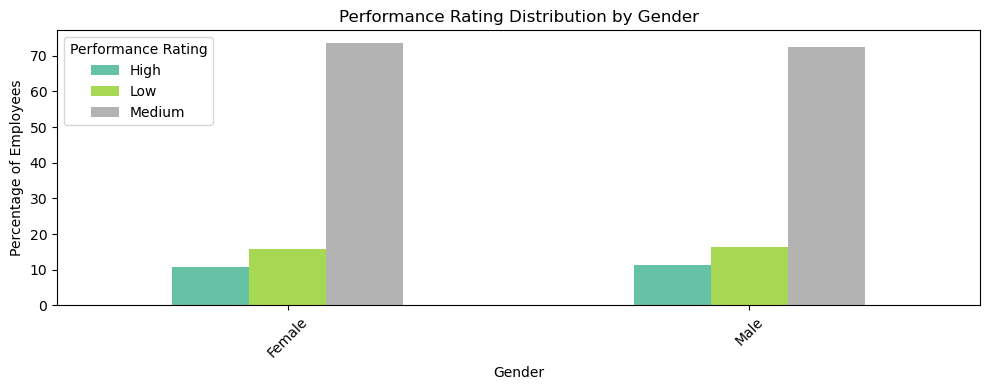

In [202]:
# Crosstab: Gender vs PerformanceRating
Gender_perf = pd.crosstab(df['Gender'], df['PerformanceRatingCat'],normalize='index')*100

# Stacked bar chart
Gender_perf.plot(kind='bar',  figsize=(10,4), colormap='Set2')

plt.title("Performance Rating Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage of Employees")
plt.xticks(rotation=45)
plt.legend(title="Performance Rating")
plt.tight_layout()
plt.show()

### Performance Rating by Gender
From the analysis, we see an **equal proportion of performance across male and female employees**.  
- Most employees fall into the **medium performance category (~70%)**.  
- A smaller portion (~15%) show **low performance**, and very few (~10%) show **high performance**.  


### ii.) Performance Rating by Education Background

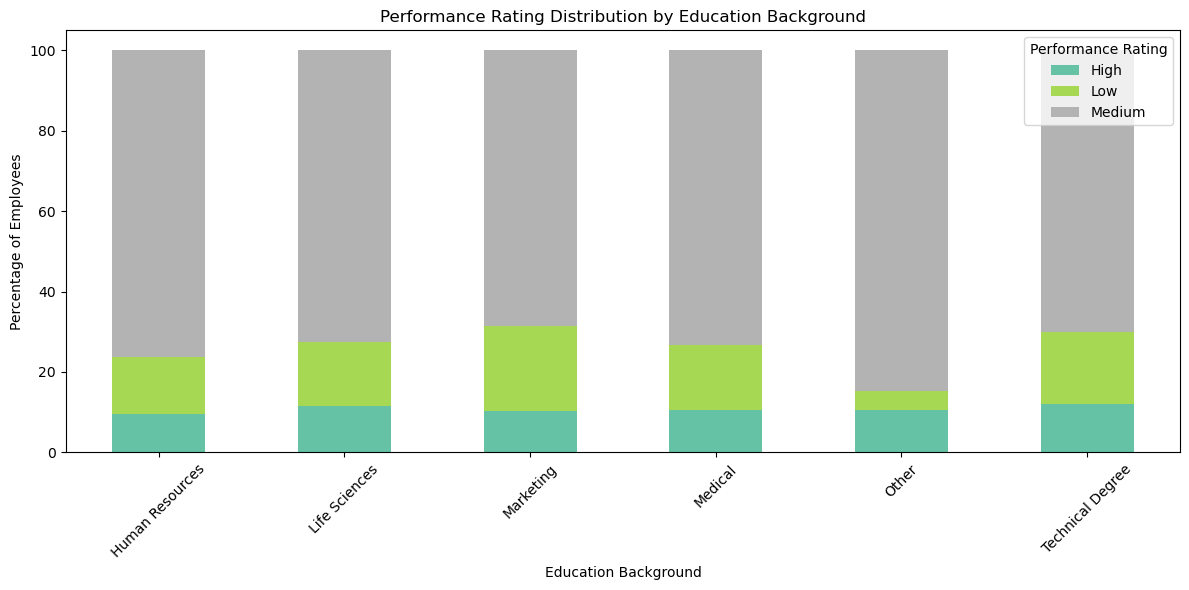

In [205]:
# Crosstab: Department vs PerformanceRating
education_perf = pd.crosstab(df['EducationBackground'], df['PerformanceRatingCat'],normalize='index')*100

# Stacked bar chart
education_perf.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

plt.title("Performance Rating Distribution by Education Background")
plt.xlabel("Education Background")
plt.ylabel("Percentage of Employees")
plt.xticks(rotation=45)
plt.legend(title="Performance Rating")
plt.tight_layout()
plt.show()


Across all education backgrounds, **medium performance dominates**.  
- Employees with **Marketing** backgrounds show the **highest percentage of low performance** compared to other groups.  
- Other education backgrounds show **very low percentages of low performance**.  

### iii.) Performance Rating by Marital Status

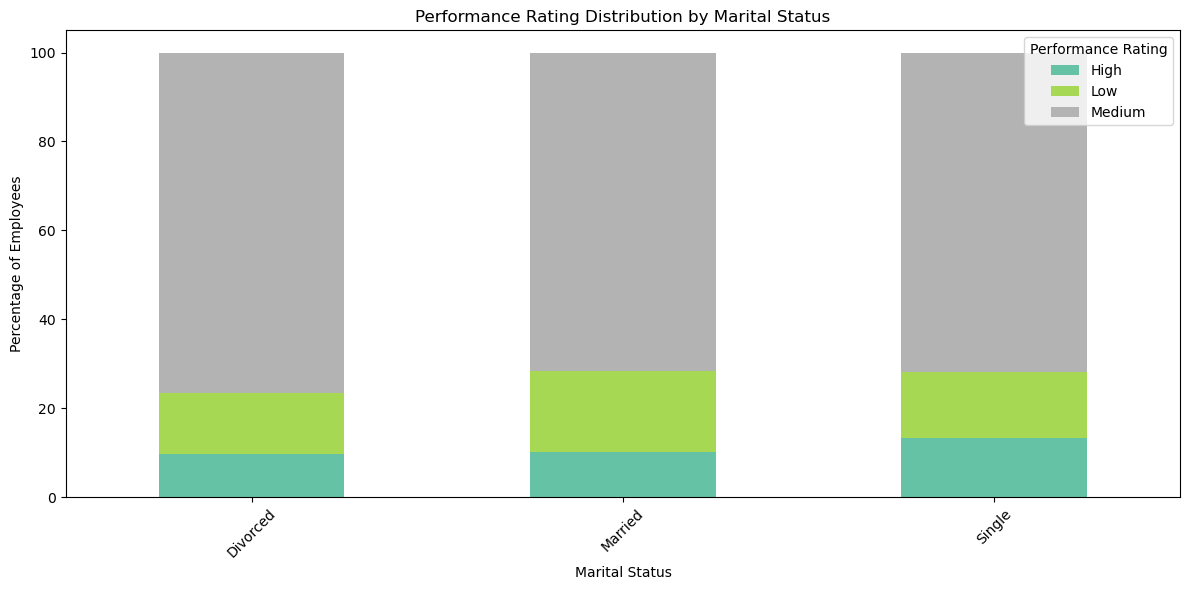

In [208]:
MaritalStatus_perf = pd.crosstab(df['MaritalStatus'], df['PerformanceRatingCat'],normalize='index')*100

# Stacked bar chart
MaritalStatus_perf.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

plt.title("Performance Rating Distribution by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Percentage of Employees")
plt.xticks(rotation=45)
plt.legend(title="Performance Rating")
plt.tight_layout()
plt.show()


### Performance Rating by Marital Status
Performance distribution is similar across marital statuses.  
- **Medium performance dominates** for all groups.  
- Employees who are **single show a slightly higher percentage of high performance** compared to married or divorced employees.  
- Employees who are married show slightly higher percentage of low performance  compared to single and divorced

### iv.)Performance Rating by Business Travel Frequency

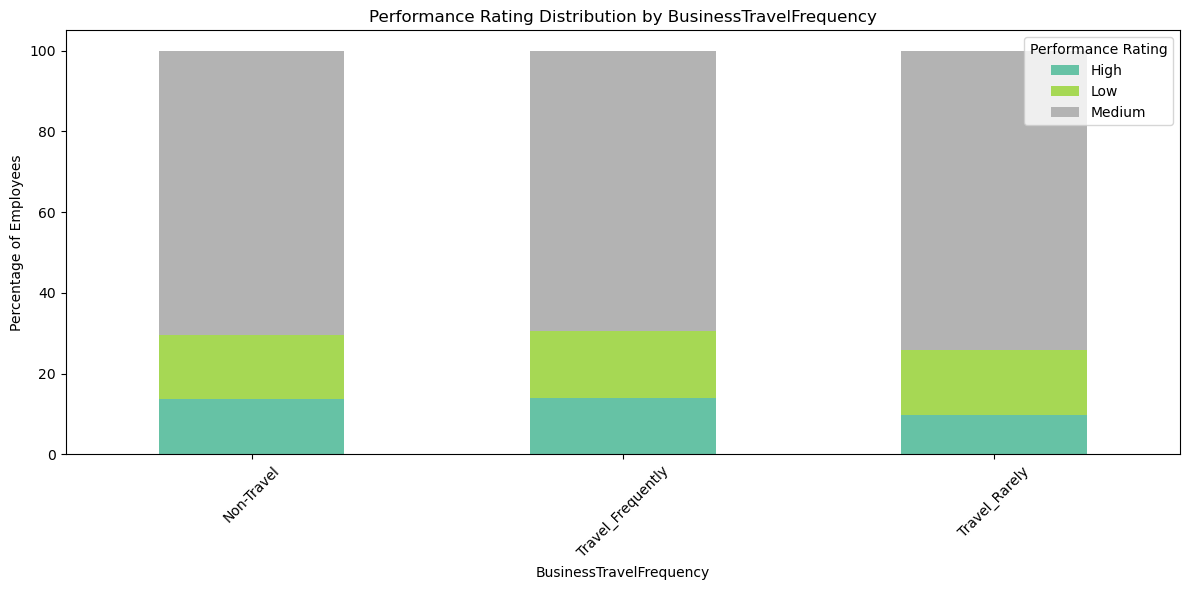

In [211]:

BusinessTravelFrequency_perf = pd.crosstab(df['BusinessTravelFrequency'], df['PerformanceRatingCat'],normalize='index')*100

# Stacked bar chart
BusinessTravelFrequency_perf.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

plt.title("Performance Rating Distribution by BusinessTravelFrequency")
plt.xlabel("BusinessTravelFrequency")
plt.ylabel("Percentage of Employees")
plt.xticks(rotation=45)
plt.legend(title="Performance Rating")
plt.tight_layout()
plt.show()


Performance is evenly distributed across travel categories.  
- **Medium performance dominates**.  
- Employees who travel **rarely show the lowest percentage in high performance** compared to frequent or non-travelers.  

### v.)Performance Rating by OverTime

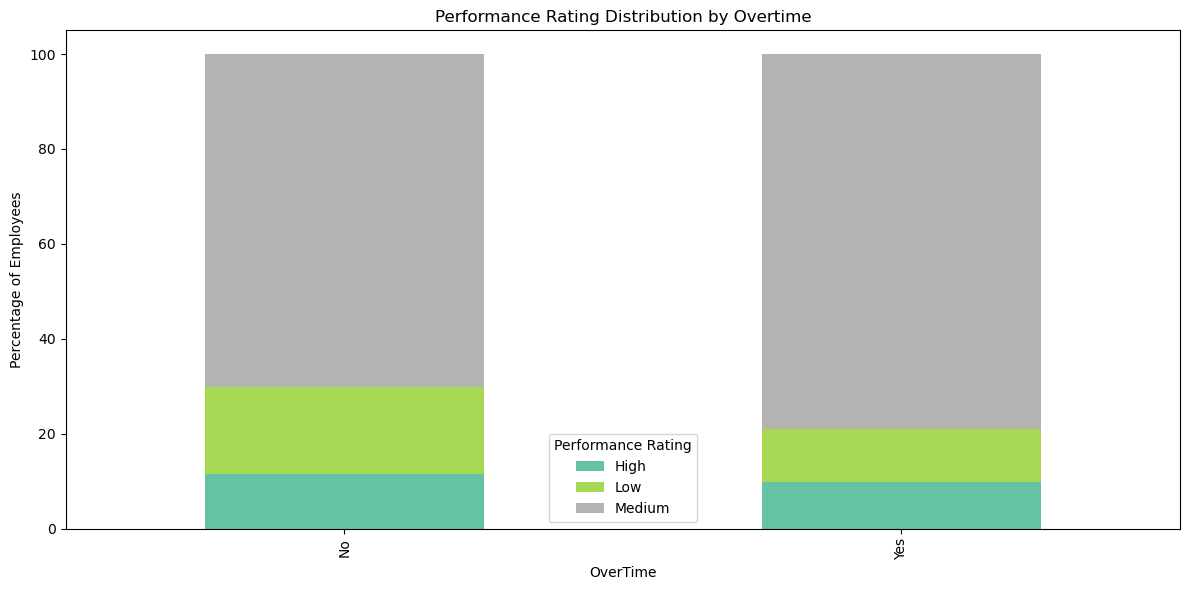

In [214]:

# Crosstab: Department vs PerformanceRating
OverTime_perf = pd.crosstab(df['OverTime'], df['PerformanceRatingCat'],normalize='index')*100

# Stacked bar chart
OverTime_perf.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

plt.title("Performance Rating Distribution by Overtime")
plt.xlabel("OverTime")
plt.ylabel("Percentage of Employees")
plt.xticks(rotation=90)
plt.legend(title="Performance Rating")
plt.tight_layout()
plt.show()

Across both overtime categories (**Yes** and **No**), medium performance dominates.  
- Employees with **no overtime show a slightly higher percentage of low performance** compared to those who work overtime.  

In [216]:
### vi.)Performance Rating by Department

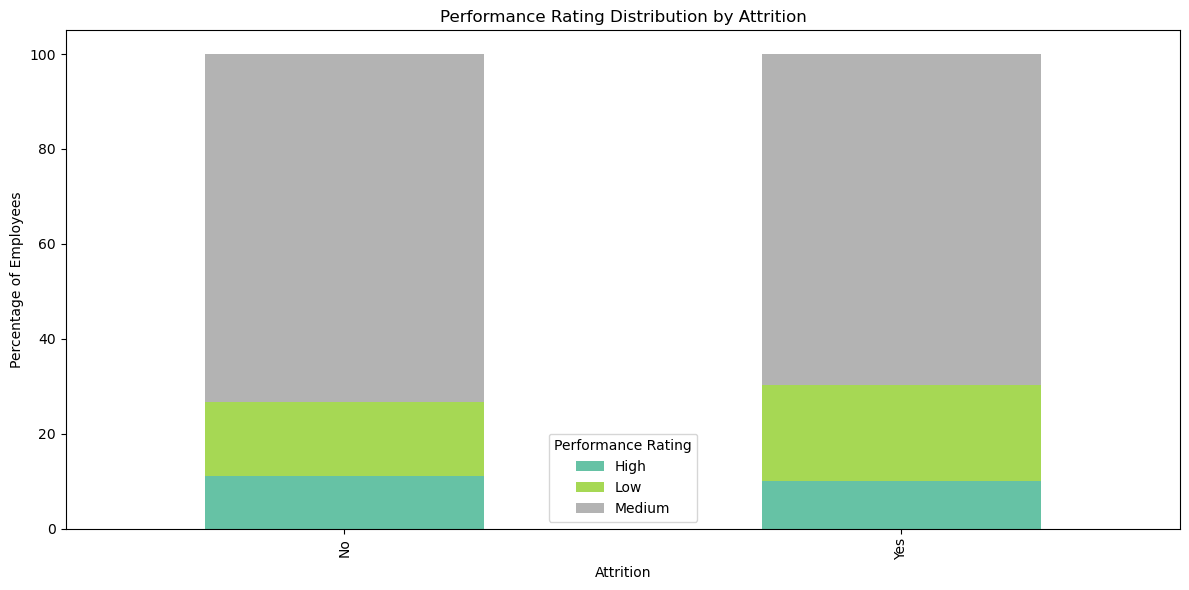

In [217]:


Attrition_perf= pd.crosstab(df['Attrition'], df['PerformanceRatingCat'],normalize='index')*100

# Stacked bar chart
Attrition_perf.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

plt.title("Performance Rating Distribution by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Percentage of Employees")
plt.xticks(rotation=90)
plt.legend(title="Performance Rating")
plt.tight_layout()
plt.show()

Performance ratings show **equal proportions for both Yes and No attrition groups**.  
- Medium performance is dominant in both cases.  
- Attrition with yes shows a slightly lower performance rating in low  performance as comapered to those who are still employed

### vii.)Performance Rating by Department

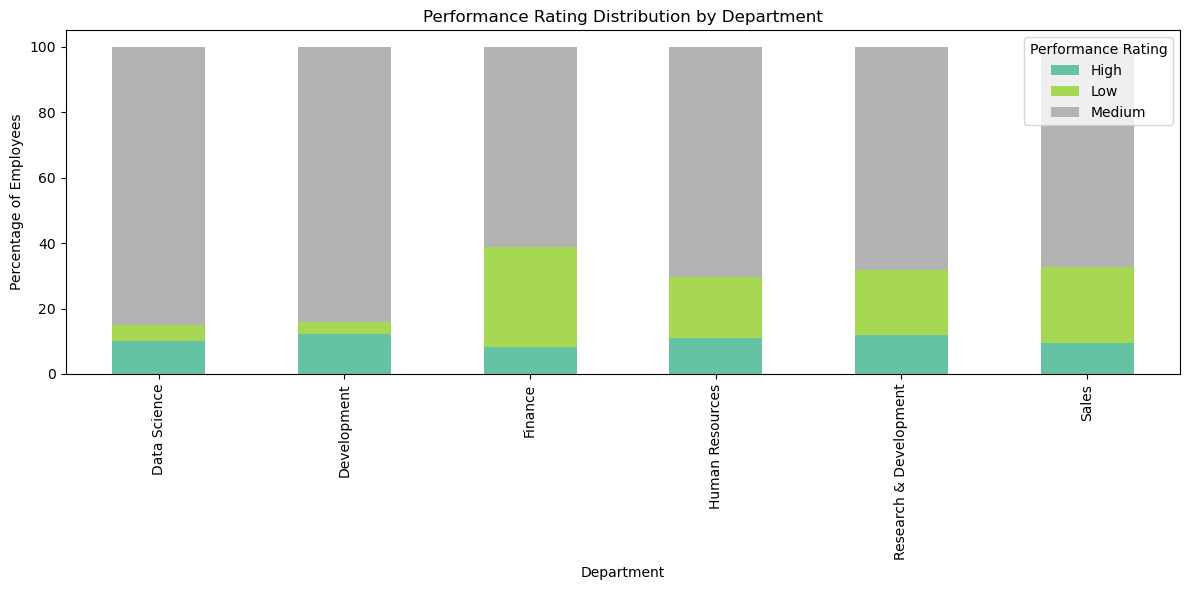

In [220]:

dept_perf = pd.crosstab(df['EmpDepartment'], df['PerformanceRatingCat'],normalize='index')*100

# Stacked bar chart
dept_perf.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

plt.title("Performance Rating Distribution by Department")
plt.xlabel("Department")
plt.ylabel("Percentage of Employees")
plt.xticks(rotation=90)
plt.legend(title="Performance Rating")
plt.tight_layout()
plt.show()


Across departments, **medium performance is dominant**.  
- **Finance employees show the highest percentage of low performance**.  
- Development employees show the **lowest percentage of low performance**.  

### viii.)Performance Rating by Job Roles

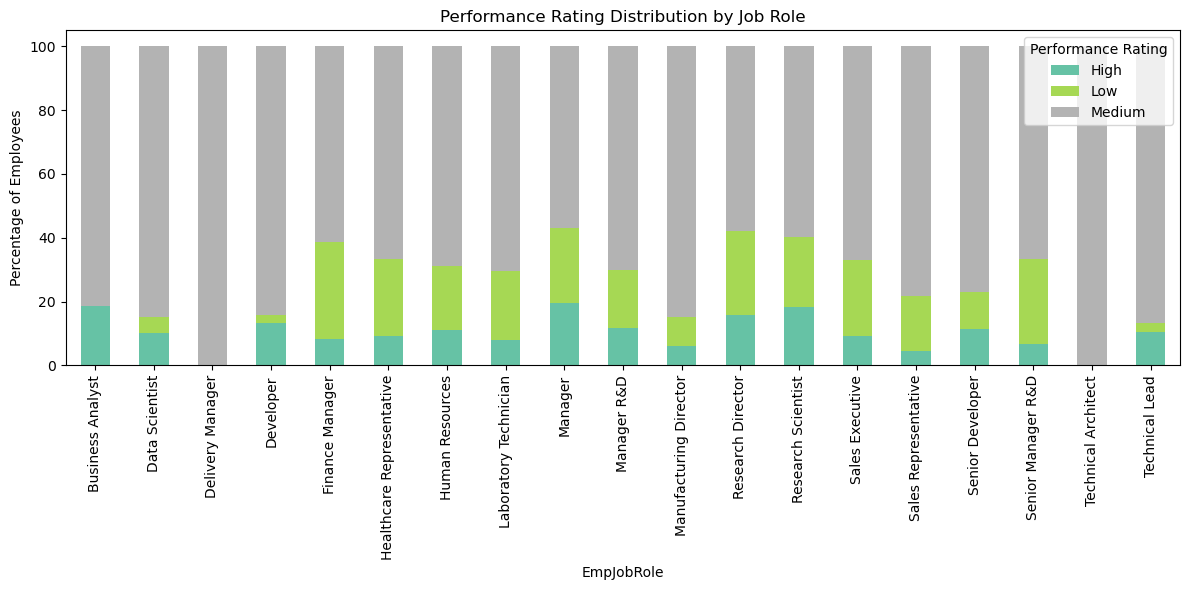

In [223]:

Jobrole_perf = pd.crosstab(df['EmpJobRole'], df['PerformanceRatingCat'],normalize='index')*100

# Stacked bar chart
Jobrole_perf.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

plt.title("Performance Rating Distribution by Job Role")
plt.xlabel("EmpJobRole")
plt.ylabel("Percentage of Employees")
plt.xticks(rotation=90)
plt.legend(title="Performance Rating")
plt.tight_layout()
plt.show()


Job roles reveal noticeable differences in performance distribution.  
- Roles like **Finance Manager** have a **higher percentage of low performance** compared to others.  
- Developer roles such as **Delivery Manager** and **Technical Architect** are dominated by **medium performance only**, with little variation.  

## 3.) Numerical Feature against performance Rating

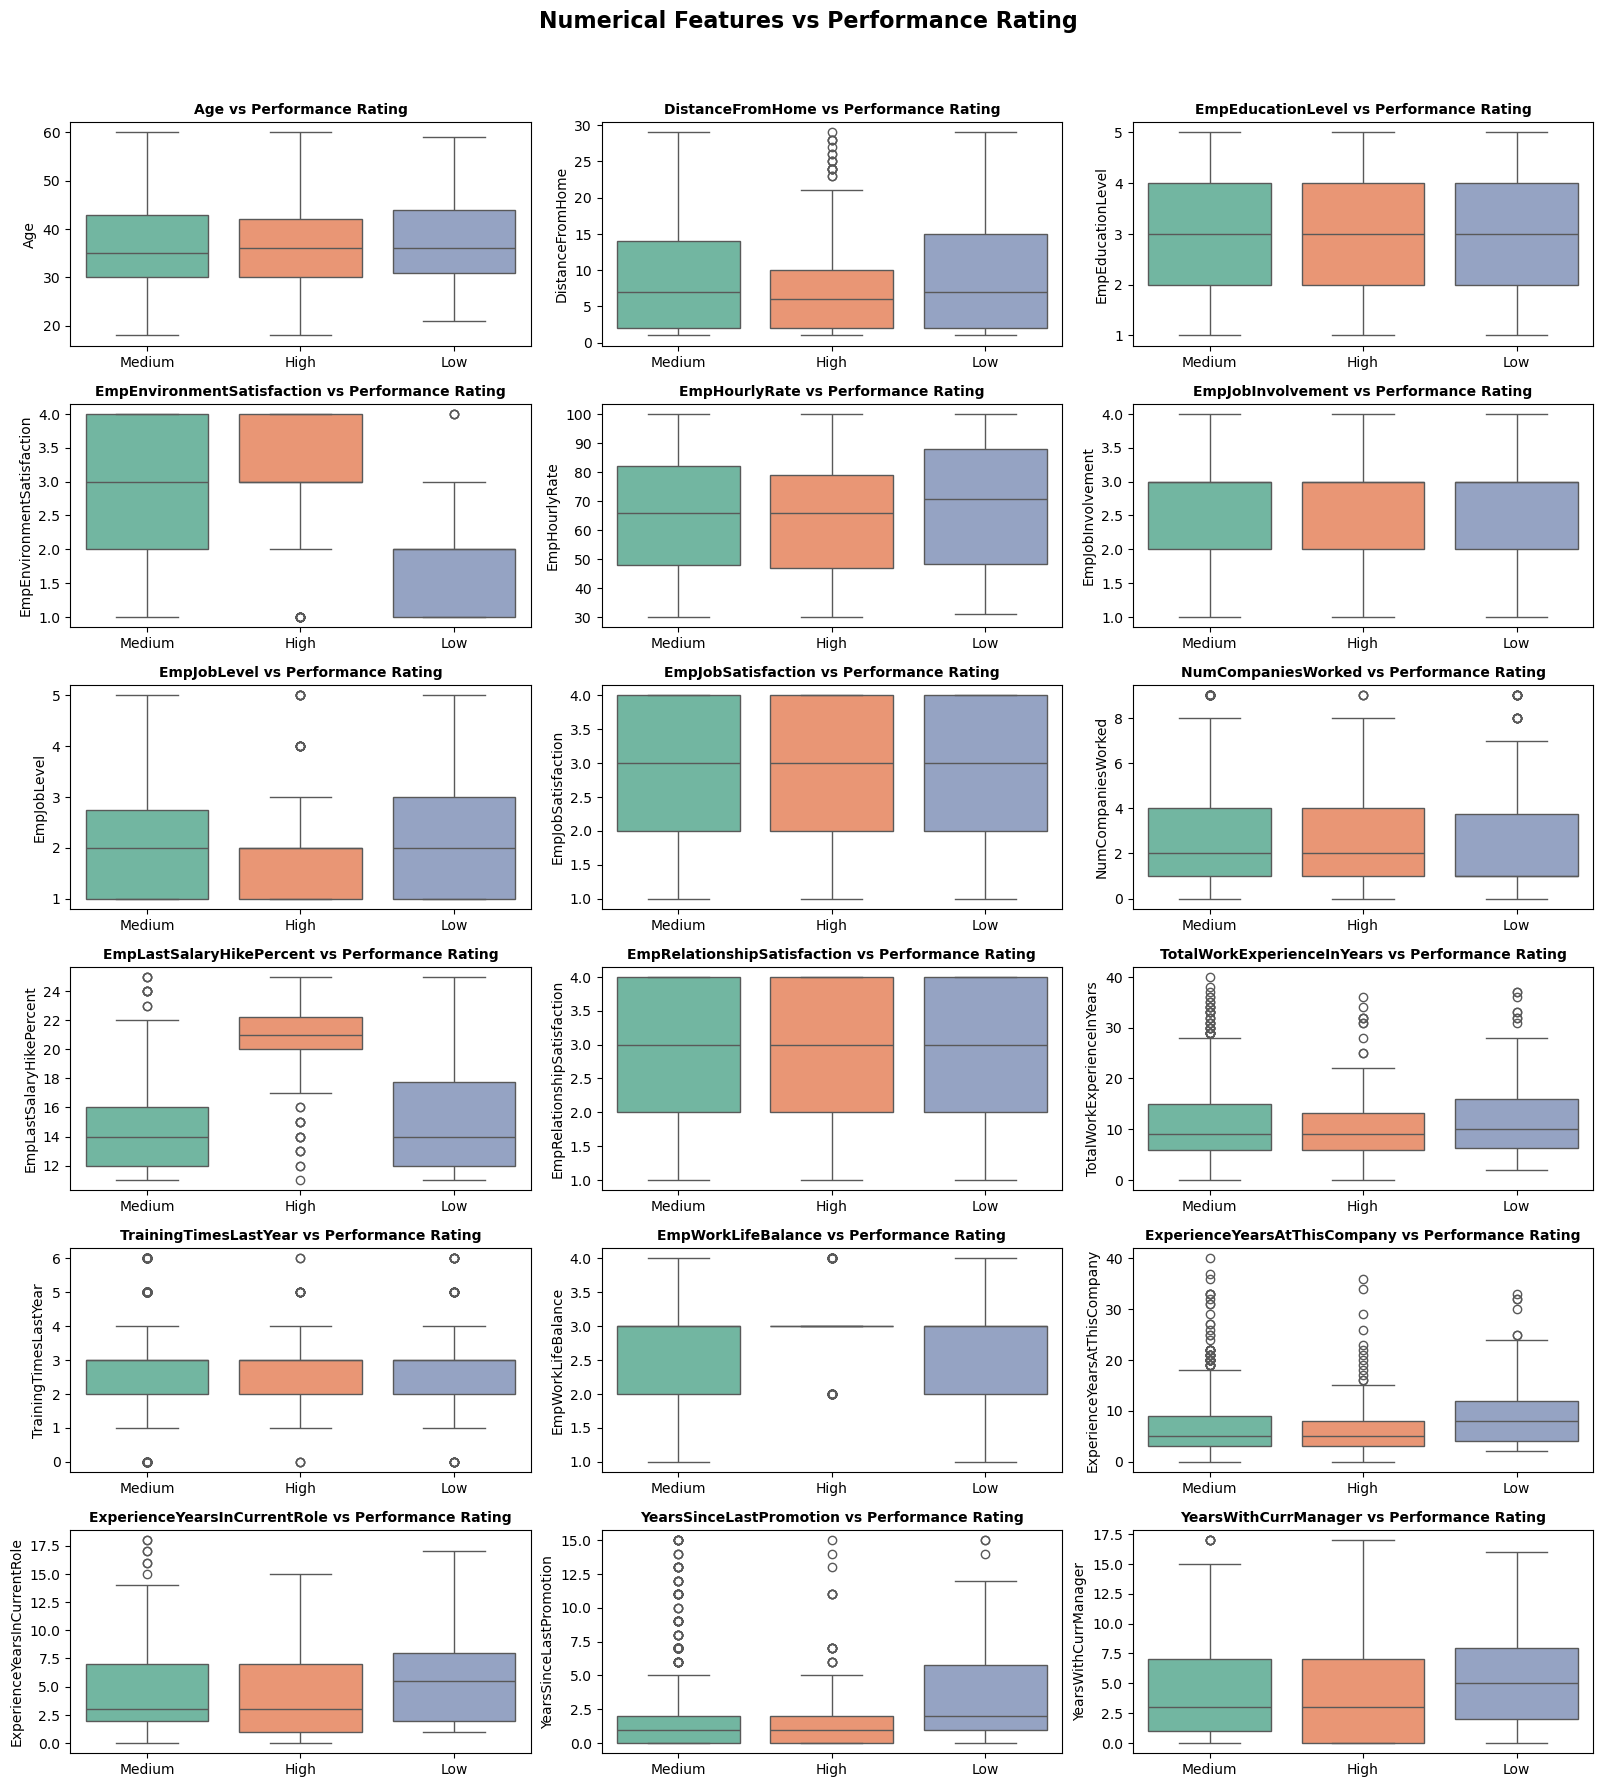

In [226]:

# Plotting violin plots for each feature against Performance Rating
plt.figure(figsize=(16, 20))


for i, col in enumerate(num_features):
    plt.subplot(7, 3, i+1)  # 4 rows, 3 columns layout
    sns.boxplot(data=df, x="PerformanceRatingCat", y=col, palette="Set2")
    plt.title(f"{col} vs Performance Rating", fontsize=10, fontweight="bold")
    plt.xlabel("")
    plt.ylabel(col)

plt.suptitle("Numerical Features vs Performance Rating", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

### Summary: Numerical Features vs Performance Rating

| Feature                        | Observation                                                                 | Insight                                                                 |
|--------------------------------|-----------------------------------------------------------------------------|-------------------------------------------------------------------------|
| **Job Involvement**            | High performers show higher involvement scores                              | Engagement is strongly linked with better performance                   |
| **Job Satisfaction**           | Slightly higher among high performers                                       | Satisfaction at work contributes positively to performance              |
| **Environment Satisfaction**   | Higher for high performers than low performers                              | Comfortable work environment encourages good performance                |
| **Training Times Last Year**   | High performers attend training more often                                  | Training opportunities can boost performance                            |
| **Years Since Last Promotion** | High performers have been promoted more recently                            | Timely promotions reflect and reinforce strong performance              |
| **Salary Hike Percent**        | High performers received slightly higher hikes                              | Pay increases are tied to employee performance                          |
| **Total Work Experience**      | High performers clustered around moderate experience                        | Very high experience doesn’t necessarily guarantee better performance   |
| **Experience in Current Role** | High performers often have moderate tenure in role                          | Balance of role familiarity (not too new, not stagnant) supports results|
| **Age**                        | Similar across all performance groups                                       | Age has little to no effect on performance                              |
| **Education Level**            | Distribution is uniform across groups                                       | Education background doesn’t strongly impact performance ratings        |
| **Distance From Home**         | Slightly shorter for high performers, but difference is small               | Commute distance not a major performance driver                         |
| **Job Level**                  | Spread is similar across groups                                             | Higher job level ≠ higher performance                                   |
| **Relationship Satisfaction**  | Nearly identical across groups                                              | Relationship satisfaction not linked with performance                   |
| **Work-Life Balance**          | Consistent across groups                                                    | Perception of balance doesn’t strongly affect ratings                   |
| **Years with Current Manager** | Very similar for all performance groups                                     | Manager tenure has minimal effect on performance                        |

---

✅ **Overall Insight**:  
High performers stand out not by age, job level, or pay, but because they are **more engaged, more satisfied, more recently promoted, and actively participate in training**.


## Numerical Feature relationship

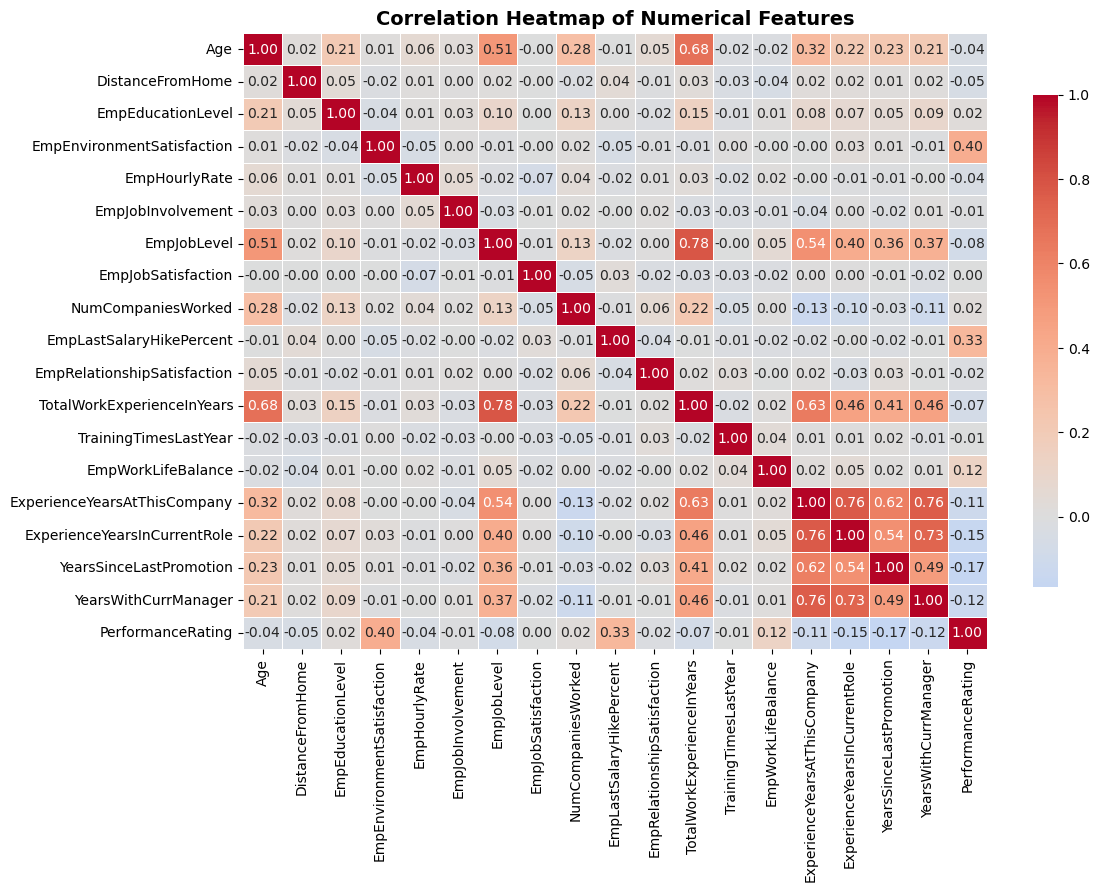

In [229]:
# Select only numerical columns
colnumFeatures = df.select_dtypes(include='int64')

# Compute correlation matrix for numeric features
corr = colnumFeatures.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,                # show correlation values
    fmt=".2f",                 # 2 decimal places
    cmap="coolwarm",           # color scheme
    center=0,                  # center colormap at 0
    linewidths=0.5,            # thin lines between cells
    cbar_kws={"shrink": 0.8}   # shrink colorbar a bit
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight="bold")
plt.show()

## Correlation Analysis of Employee Features

#### i.)  Correlation Analysis and Multicollinearity


From the correlation analysis, the highest correlations observed were **0.78** between `EmpJobLevel` and `TotalWorkExperienceInYears`, and **0.76** among `ExperienceYearsInCurrentRole`, `ExperienceYearsAtThisCompany`, and `YearsWithCurrManager`. 

Although these features show moderately high positive correlations, none exceed the threshold typically used to indicate severe multicollinearity. Therefore, these features can be retained, as they do not pose a significant risk of redundancy in the dataset.


#### ii.) Features with Very Low Correlation to Target

Several features—such as `Age`, `DistanceFromHome`, `EmpEducationLevel`, `EmpHourlyRate`, `EmpJobInvolvement`, `EmpJobLevel`, `EmpJobSatisfaction`, `NumCompaniesWorked`, and `TrainingTimesLastYear`—show very low correlation with the target. 

However, low correlation does **not imply irrelevance**; domain knowledge is essential, as some features may have non-linear effects or provide valuable information in combination with others. Careful evaluation is recommended before removal.


#### iii.)Feature Significance and Redundancy


##### Potentially Redundant / Candidates for Removal
- **Age** – closely resembles `TotalWorkExperienceInYears`.  
- **NumCompaniesWorked** – largely reflects overall work experience.  
- **EmpDepartment** – largely explained by `EmpJobRole` and the employee’s role, adding little unique information.  

#### Features Deemed Significant and Retained
- **DistanceFromHome** – unique information.  
- **EducationLevel** – adds detail beyond `EducationBackground`.  
- **EmpHourlyRate** – important for modeling compensation effects.  
- **EmpJobInvolvement**, **EmpJobLevel**, **EmpJobSatisfaction** – capture engagement and role significance.  
- **EmpRelationshipSatisfaction** – unique insight into employee relations.  
- **TrainingTimesLastYear** – relevant for development opportunities.  

#### Summary
Features that show **redundancy or low unique significance** may be considered for removal, while the rest should be retained to preserve predictive power and domain relevance.


In [237]:
df1=df.copy()
df1=df1.drop(['EmpNumber','Age','NumCompaniesWorked','EmpDepartment','PerformanceRatingCat'],axis=1)



In [238]:
df.shape  ,df1.shape

((1200, 29), (1200, 24))

In [239]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating',
       'PerformanceRatingCat'],
      dtype='object')

In [279]:
# Save df1 to a CSV file
df1.to_csv('New_Cleaned_data', index=False)
